In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:

class MiniBatchGDRegression:

    def __init__(self):
        """
        Initialize the Mini-Batch Gradient Descent Regression model.
        """
        self.coefs_ = None  # weights of your model
        self.intercept_ = None  # bias of your model
        self.batch_size = None  # size of each mini-batch
        self.max_iteration = None  # maximum number of iterations
        self.lr = None  # learning rate for gradient descent

    def fit(self, X_train, y_train, batch_size=32, lr=0.01, max_iteration=100):
        """
        Fit the linear regression model to the training data using mini-batch gradient descent.

        Parameters:
            X_train (numpy.ndarray): Training data features with shape (n_samples, n_features).
            y_train (numpy.ndarray): Target values with shape (n_samples,).
            batch_size (int, optional): Size of each mini-batch. Default is 32.
            lr (float): Learning rate, determines the step size in the gradient descent update (default=0.01).
            max_iteration (int): Maximum number of iterations for gradient descent (default=100).
        """

        self.lr = lr
        self.max_iteration = max_iteration
        self.batch_size = batch_size
        self.coefs_ = np.zeros(X_train.shape[1])  # Initialize model coefficients
        X_train = np.array(X_train)
        y_train = np.array(y_train).reshape(len(y_train))
        self.intercept_ = 0  # Initialize model intercept
        m = X_train.shape[0]  # Number of training samples

        for i in range(self.max_iteration):
            for j in range(int(m / self.batch_size)):
                n = random.sample(range(m), self.batch_size)  # Randomly sample a mini-batch
                fx = np.dot(X_train[n, :], self.coefs_) + self.intercept_
                intercept_gradient = -np.mean(y_train[n] - fx)  # Calculate intercept gradient
                self.intercept_ -= (self.lr * intercept_gradient)  # Update intercept using gradient descent

                coefficient_gradient = -np.dot((y_train[n] - fx), X_train[n, :]) / len(n)  # Calculate coefficient gradient
                self.coefs_ -= (self.lr * coefficient_gradient)  # Update coefficients using gradient descent

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
            X (numpy.ndarray): Input data with shape (n_samples, n_features).

        Returns:
            (numpy.ndarray): Predicted target values with shape (n_samples,).
        """

        return np.dot(X, self.coefs_) + self.intercept_

    def score(self, X, y_actual):
        """
        Evaluate the model's performance using the coefficient of determination (R^2 score).

        Parameters:
            X (numpy.ndarray): Input data with shape (n_samples, n_features).
            y_actual (numpy.ndarray): Actual target values with shape (n_samples,).

        Returns:
            float: The R^2 score indicating the goodness of fit of the model.
        """
        y_actual = np.array(y_actual).reshape(len(y_actual))
        y_pred = self.predict(X)
        return (1 - (float(np.sum(np.power((y_actual - y_pred), 2)))) / (
            np.sum(np.power(y_actual - np.mean(y_actual), 2))))


In [ ]:
df = pd.read_csv("... \\DtatSet.csv")

xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:, 1:], df.iloc[:, 0])
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [6]:
# Example Usage:
# Instantiate the Model
model = MiniBatchGDRegression()

# Train the model on training data
model.fit(xtrain, ytrain, batch_size=32, lr=0.1, max_iteration=1000)

# Make predictions on new data
predictions = model.predict(xtest)

# Evaluate the model using R^2 score
r_squared = model.score(xtest, ytest)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


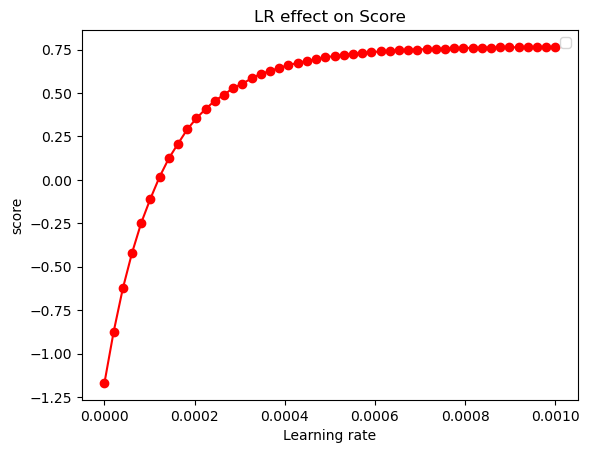

In [7]:
import matplotlib.pyplot as plt

GD = MiniBatchGDRegression()
scor = []
LR = list(np.linspace(0,0.001,50))
for r in range(len(LR)):
    GD.fit(xtrain, ytrain, lr=LR[r], max_iteration=100)
    scor.append(GD.score(xtest, ytest))

plt.plot(LR,scor, color="red", marker="o")
plt.xlabel('Learning rate')
plt.ylabel('score')
plt.title('LR effect on Score')
plt.legend()
plt.show()